# Creating Word-Curves With The `curves` Library

In [1]:
import sys
sys.path.insert(0, '../')

from src import curves
from src import words

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define a custom word-plotter real quick

def plot_curve(curve, grid=True, show_ep=True, title=None, show=True):
    x,y = curve.T
    xs, ys = curve[0]
    xf,yf = curve[-1]
    plt.gca().set_aspect('equal')
    if grid:
        plt.grid()
    plt.plot(x,y, c='black')
    if show_ep:
        plt.plot([xs],[ys],c='green',marker='>')
        plt.plot([xf],[yf],c='red',marker='s')
    if not title is None:
        plt.title(title)
    if show:
        plt.show()

## How are words drawn?
The word-drawing rule is a turtle-graphics algorithm (or a non-branching lindenmeyer system, if you like):

```
Define a turning angle alpha.

Start at the origin, pointing to the right (pi/2)

For each character in the word:

    If the character is a 1:
        Take a step forward in your current direction
        
    If the character is a 0:
        Take a step forward in your current direction
        
        If the index of this character is even:
            turn right by alpha
            
        If the index of this character is odd:
            turn left by alpha
```

## How To Use
* Draw any word from the words library, as long as it has the alphabet $\Sigma =\{0,1\}$.
* Non-$\Sigma$ characters get skipped, but they do impact the index of the next characters.

Draw a Fibonacci word:

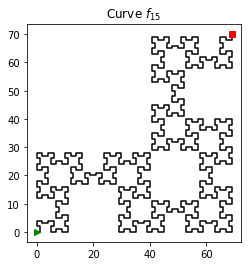

In [3]:
myword = words.fibonacci(n=15)
alpha = np.pi/2 # the turning angle

curve = curves.get_curve(myword, alpha)

plot_curve(curve, title='Curve $f_{15}$', grid=False)

Draw an $i$-Fibonacci word, and 'normalize' it by rotation and scaling such that the final vertex is drawn at $(1,0)$.

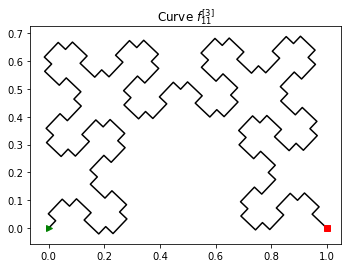

In [4]:
myword = words.i_fibonacci(n=11, i=3)
alpha = np.pi/2 # the turning angle

curve = curves.get_normed_curve(myword, alpha)

plot_curve(curve, title='Curve $f^{[3]}_{11}$', grid=False)

Create different iterations of the $2$-nacci word and view the periodic structure of the word-curve.

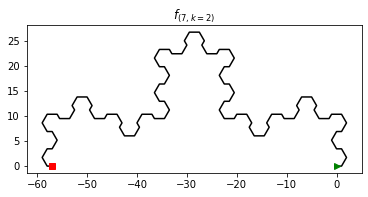

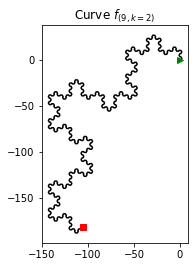

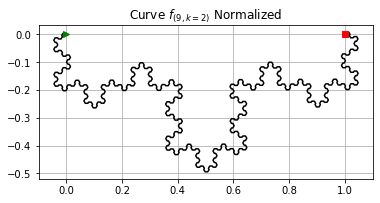

In [5]:
myword = words.knacci(n=9, k=2)
alpha = np.pi/3

curve = curves.get_curve(myword, alpha)
normed_curve = curves.get_normed_curve(myword, alpha)

len_nm2 = len(words.knacci(7,2))

plot_curve(curve[:len_nm2], title='$f_{(7,k=2)}$',grid=False)
plot_curve(curve, title='Curve $f_{(9,k=2)}$', grid=False)
plot_curve(normed_curve, title='Curve $f_{(9,k=2)}$ Normalized')

View subsequent iterations of the normalized 3-nacci word-curve:

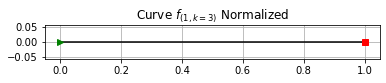

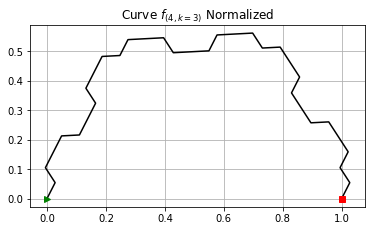

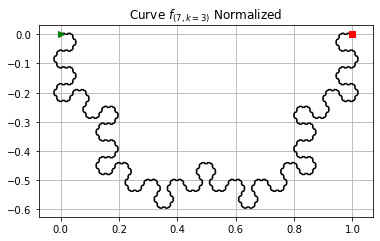

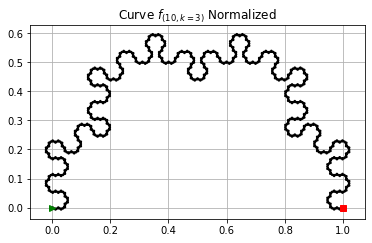

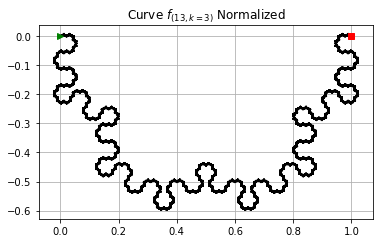

In [6]:
alpha = np.pi/3
for n in range(1,15,3):
    myword = words.knacci(n=n, k=3)
    normed_curve = curves.get_normed_curve(myword, alpha)
    plot_curve(normed_curve, title='Curve $f_{('+str(n)+',k=3)}$ Normalized')

Let's look at a more exotic word-curve, the tribonacci word-curve.

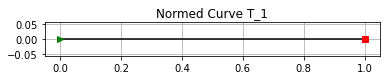

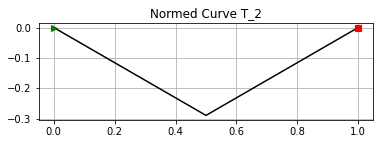

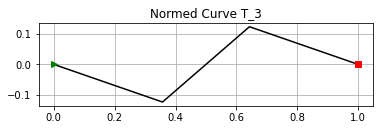

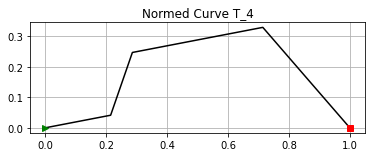

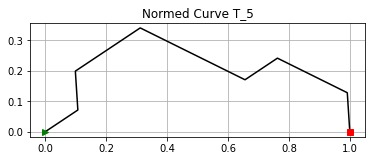

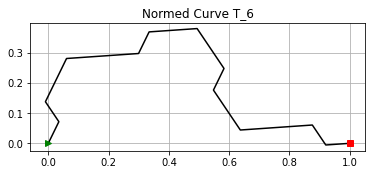

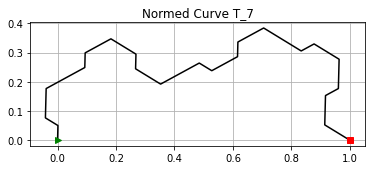

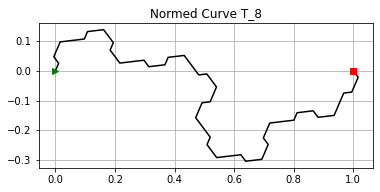

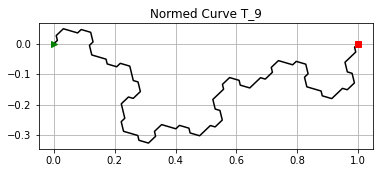

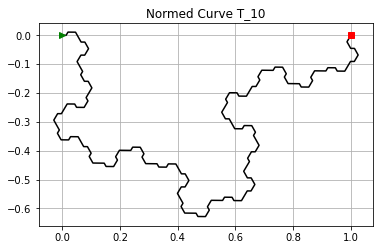

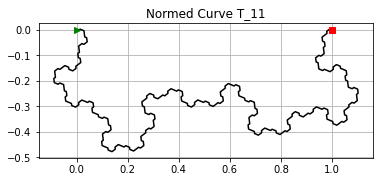

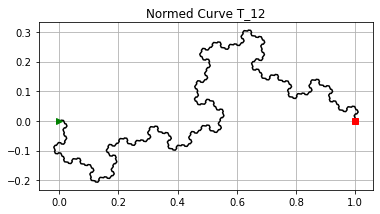

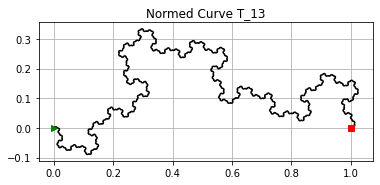

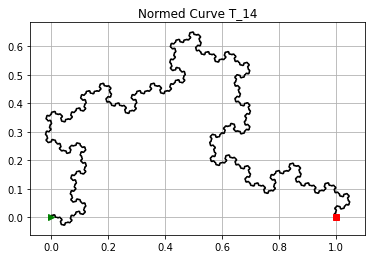

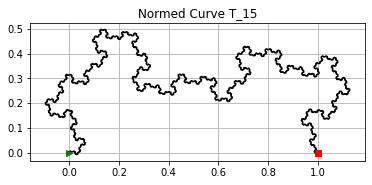

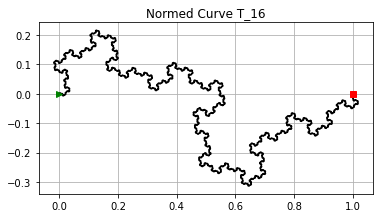

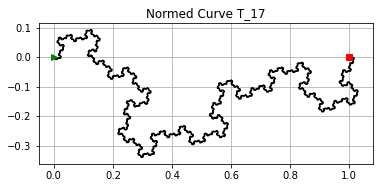

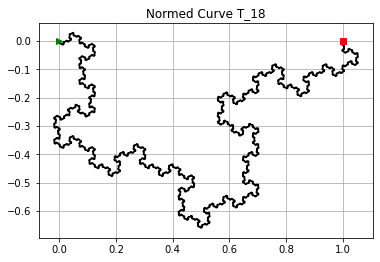

In [7]:
alpha = np.pi/3
for n in range(1,19,1):
    myword = words.tribonacci(n=n)
    curve = curves.get_normed_curve(myword, alpha)
    plot_curve(curve, title=f'Normed Curve T_{n}')

You can also draw arbitrary curves that interest you.

In [8]:
custom_word = '001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001001000100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010010001001000100100010010010001001000100100100010010001001000100100100010010001001001000100100010010001'
custom_subword = custom_word[:577]

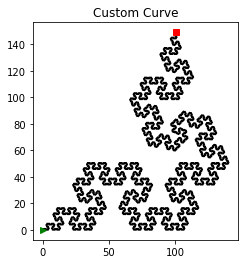

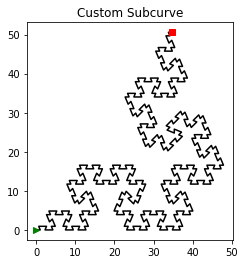

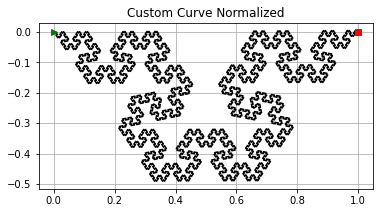

In [9]:
alpha = 5*np.pi/8

curve = curves.get_curve(custom_word, alpha)
subcurve = curves.get_curve(custom_subword, alpha)
normed_curve = curves.get_normed_curve(custom_word, alpha)

plot_curve(curve, title='Custom Curve', grid=False)
plot_curve(subcurve, title='Custom Subcurve', grid=False)
plot_curve(normed_curve, title='Custom Curve Normalized')

Generate custom recursive word systems with `wordgen` and plot them out:

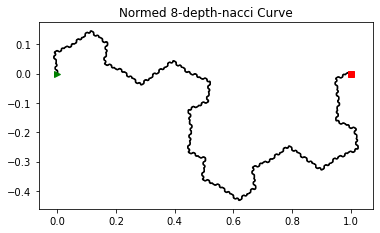

In [10]:
#arbitrary depth-nacci curve
depth = 8
iters = 15
base_cases = ["0"*i+"1" for i in range(depth)]
rule = lambda w: "".join(w[-1:-depth-1:-1])

myword = words.wordgen(iters, base_cases, rule, return_all=False)


alpha = np.pi/3
curve = curves.get_normed_curve(myword, alpha)

plot_curve(curve, title=f'Normed {depth}-depth-nacci Curve', grid=False)